## Mini Project

### Introduction

Apple provides an api to get some useful information from iTunes and Apple Book Store content. 
You can read more details about this service <a href="https://affiliate.itunes.apple.com/resources/documentation/itunes-store-web-service-search-api/">here</a>. In this mini project, we will use the mentioned service to get info. about the first 50 audio books that talks about data from Apple store.

### Step .1
- Fetch the data from using the following URL: https://itunes.apple.com/search?term=data&country=us&entity=audiobook&limit=50

In [1]:
# Your Code Here

import requests

url = "https://itunes.apple.com/search?term=data&country=us&entity=audiobook&limit=50"
data = requests.get(url)

json_data = data.json()

### Step .2
- Save these data into a DataFrame that should look as follows (extract the required data only):

|    | artistName    | collectionName                                                                                         | releaseDate          | primaryGenreName            |   collectionPrice | collectionViewUrl                                                                                         |
|---:|:--------------|:-------------------------------------------------------------------------------------------------------|:---------------------|:----------------------------|------------------:|:----------------------------------------------------------------------------------------------------------|
|  0 | Emily Oster   | Cribsheet: A Data-Driven Guide to Better, More Relaxed Parenting, from Birth to Preschool (Unabridged) | 2019-04-23T07:00:00Z | Nonfiction                  |             14.99 | https://books.apple.com/us/audiobook/cribsheet-a-data-driven-guide-to-better-more/id1459654300?uo=4       |
|  1 | George Gilder | Life After Google: The Fall of Big Data and the Rise of the Blockchain Economy                         | 2018-07-17T07:00:00Z | Business & Personal Finance |             14.99 | https://books.apple.com/us/audiobook/life-after-google-the-fall-of-big-data-and/id1454667331?uo=4         |
|  .. | ...  | ...    | ... | ...  | ... | ... |
| 49 | William Sullivan | SQL Data Warehouse Database Management, SQL Server, Structured Query Language, Business Intelligence, Data Models: Master SQL Programming (Unabridged) | 2018-05-14T07:00:00Z | Science & Nature   |              5.99 | https://books.apple.com/us/audiobook/sql-data-warehouse-database-management-sql-server-structured/id1385009049?uo=4 |

In [2]:
# Your Code Here
import pandas as pd

df = pd.DataFrame(json_data['results'])

df = df[['artistName', 'collectionName', 'releaseDate', 'primaryGenreName', 'collectionPrice', 'collectionViewUrl']]

### Step .3
- Rename the dataframe columns to be: `'author','collectionName','date','genre','price','url'`

In [3]:
# Your Code Here
df = df.rename(columns = {"artistName": "author", "releaseDate": "date", "primaryGenreName": "genre", "collectionPrice": "price",
                     "collectionViewUrl": "url"})

### Step .4
- Your dataFrame doesn't contain some importat data. such as (`the name of the narrator`, and `the length of the audiobook`).
So add this data to each book in the dataframe, by fetching and extracting it from the audiobook `url` that exist in your dataframe for each book

**Hints:** 
   - Write code to visit each url, find the div with the class `book-badge__value` in that url, then you will get all these values in a list.
   - You can use `df[col_name].apply(function_name)` to apply certain function on each value in a certain column


In [4]:
# Your Code Here
from bs4 import BeautifulSoup

n = df.shape[0]
df['narrator_name'] = 'xxx'
df['length'] = 'xxx'

for i in range(n):
    url = df.iloc[i, -3]
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, "html.parser")
    div = soup.find_all('div', class_ = 'book-badge__value')

    narrator = div[0].text.strip()
    length = div[2].text
    df.iloc[i, -2] = narrator
    df.iloc[i, -1] = length

### Step .5
- In the column date keep only the year
- Convert `year` into `int` datatype and `price` to `float` datatype
- Remove the column `url` from the dataframe as it is not required anymore

Your dataFrame should look as follows:

|    | author        | collectionName                                                                                         |   date | genre                       |   price | narrator   | length   |
|---:|:--------------|:-------------------------------------------------------------------------------------------------------|-------:|:----------------------------|--------:|:-----------|:---------|
|  0 | Emily Oster   | Cribsheet: A Data-Driven Guide to Better, More Relaxed Parenting, from Birth to Preschool (Unabridged) |   2019 | Nonfiction                  |   14.99 | KV         | 10:36    |
|  1 | George Gilder | Life After Google: The Fall of Big Data and the Rise of the Blockchain Economy                         |   2018 | Business & Personal Finance |   14.99 | EMS        | 09:38    |
|  .. | ...  | ...    | ... | ...  | ... | 
| 49 | William Sullivan | SQL Data Warehouse Database Management, SQL Server, Structured Query Language, Business Intelligence, Data Models: Master SQL Programming (Unabridged) |   2018 | Science & Nature |    5.99 | LH         | 02:49    |

In [5]:
# Your Code Here

df['date'] = df['date'].str[:4]

df['date'] = df['date'].astype(int)
df['price'] = df['price'].astype(float)
df.drop('url', axis = 1)

,author,collectionName,date,genre,price,narrator_name,length
0,Emily Oster,"Cribsheet: A Data-Driven Guide to Better, More...",2025,Nonfiction,14.99,EO,10:25
1,Caroline Criado-Perez,Invisible Women: Data Bias in a World Designed...,2019,Science & Nature,14.99,CC,09:25
2,Cathy O'Neil,Weapons of Math Destruction: How Big Data Incr...,2016,Nonfiction,14.99,CO,06:23
3,Charles Wheelan,Naked Statistics: Stripping the Dread from the...,2013,Mysteries & Thrillers,21.99,JD,10:49
4,Tim Harford,The Data Detective: Ten Easy Rules to Make Sen...,2021,Business & Personal Finance,14.99,TH,10:24
5,Cole Nussbaumer Knaflic,Storytelling with Data: A Data Visualization G...,2018,Business & Personal Finance,17.99,CNK,05:44
6,Mark Roberge,"The Sales Acceleration Formula : Using Data, T...",2022,Business & Personal Finance,14.99,RF,06:24
7,Carl T. Bergstrom & Jevin D. West,Calling B******t: The Art of Skepticism in a D...,2020,Nonfiction,14.99,PZ,10:17
8,Paul Leonardi & Tsedal Neeley,The Digital Mindset : What It Really Takes to ...,2022,Business & Personal Finance,14.99,EC,06:42
9,Lars Nielsen & Noreen Burlingame,A Simple Introduction to Data Science (Unabrid...,2025,Science & Nature,6.99,OD,01:24


### Step .6
- Find the number of audiobooks pubished before year 2015


In [6]:
# Your Code Here

df[df['date'] < 2015].shape[0]

2

### Step .7
- Find the name of the author who has the largest number of audiobooks
- Find the all audiobooks of that author and show their genre

In [7]:
# Your Code Here

df.groupby('author').size().idxmax()

'Herbert Jones'

### Step .8
- Find the title of the most expensive collection
- Find the name of the narrator who has the longest audiobook
- Find the number of diffenet genres

In [ ]:
# Your Code Here




### Step .9
- Compare the mean price of different genre
- Compare the mean price of different years

In [ ]:
# Your Code Here


### Step .10
- Find the year that has the highest number of Nonfiction audiobooks

In [22]:
# Your Code Here
nonFiction = df[df['genre'] == 'Nonfiction']
nonFiction.groupby('date').size().idxmax()



2016

### Step .11
- Compare (visually) between the number of books in different genre (make sure that your chart is meaningful)

<Axes: xlabel='count', ylabel='genre'>

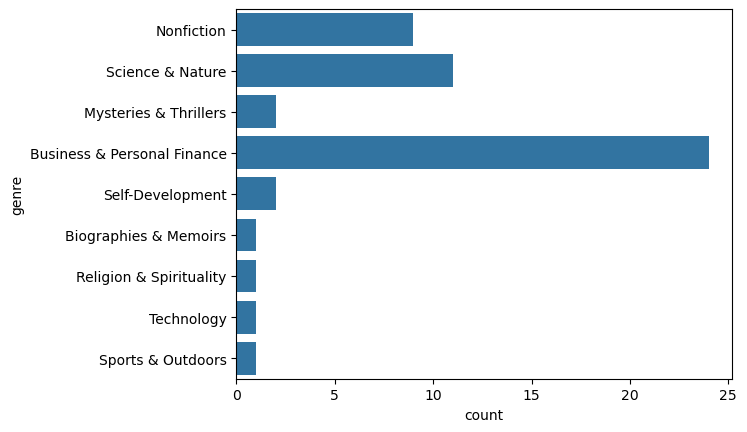

In [23]:
# Your Code Her
import seaborn as sns

sns.countplot(data = df, y = 'genre')


### Step .12
- Compare (visually) between the number of books published in different years (make sure that your chart is meaningful)

<Axes: xlabel='count', ylabel='date'>

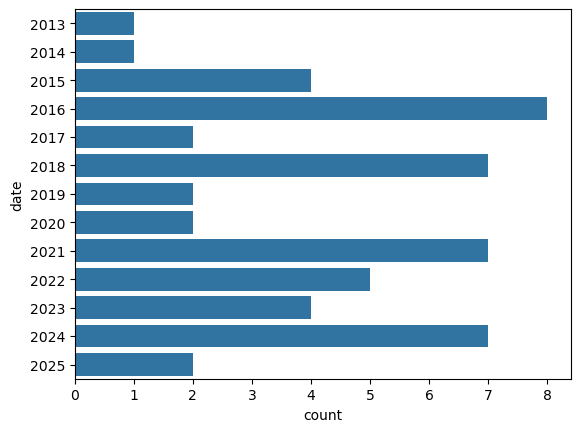

In [18]:
# Your Code Here

sns.countplot(data = df, y = 'date')